## Using the model to do predictions

**NOTE: The code below, assumes that the model is already built and stored in variable <code>model</code>**

Let's use the model we built and stored in `model`, to do some predictions.

The second image in the testing dataset is used (`X_test[1]`), first, the image is shown using (`imshow()`), then predictions is made on the image. Recall that `X_test[1]` is list of 1D representations of the images, therefore, it needs to be converted back to a 2D of $28 \times 28$ pixles before passed in to `imshow()` for display.

Then, two prediction functions will be used:

1- `model.predict()`: takes in a numpy array of 1D representation of an image, and produces the posterior probabilites of all possible classes, in our example, we have 10 classes corresponding to letters *a* to *j*.

2- `model.predict_classes()`: takes in a numpy array of 1D representation of an image and process a class.


posterior probabilities for of each class: [[0.00179249 0.00967619 0.03170863 0.00785542 0.00198635 0.00108948
  0.22192544 0.00066787 0.00077771 0.0035956 ]]
predicted class (highest posterior): [6]


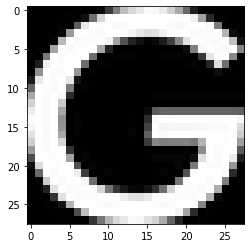

In [12]:
#Let's try to use the model to predict the class of the 2nd element
#in our testing data set (i.e., X_test[1])

#In order to show it as an image, we need to convert it back to 2D (28 x 28)
#array of pixles
image_as_1D = X_test[1]
image_as_2D = np.reshape(image_as_1D, (28, -1)) # 2nd dimension can be inferred

plt.imshow(image_as_2D, cmap="gray");

#Using predict() and predict_classes
#both functions, expect the 1D version of the image
predicted = model.predict(np.array([image_as_1D]))
predicted_class = model.predict_classes(np.array([image_as_1D]))
print("posterior probabilities for of each class: {}".format(predicted))
print("predicted class (highest posterior): {}".format(predicted_class))


## Generating the confusion matrix

In order to create confusion matrix on the testing data set

1- obtain true classes for images in the testing data set: recall that y_test is one-hot encoding of true class, need to be converted back a class, function, ohe_to_classes(y), will be used to do that. The function simply takes a list of one-hot encoded classes, and returns a list of scalars, scalars represent the index of the 1 value in each one-hot encoded class of y.

2- use the model to predict classes of all images in the test data set (use .predict_classes)

3- use functions, classification_report, confusion matrix, f1_score and accuracy_score from sklearn.metrics module as needed.


In [7]:
import numpy as np
def ohe_to_classes(y):
    '''
        converts one hot encoding to classes
        y: a list of one-hot-encoded classes of data points
    '''
    return [np.argmax(v) for v in y]


In [8]:
# Let's try it

# an example of an array of one-hot-encoded classes, note that each row has exactly one value as 1.
# this example represents 2 data points
# Note that we have three classes in this example, class 0, 1, 2
ohe_example= [[0, 1, 0], [1, 0, 0]]

# the function converts the one-hot-encoding of the data sample class, to its class (0, 1, or 2)
true_classes = ohe_to_classes(np.array(ohe_example))

# true_classes is an 1D array of the sample data classes.
print("class of data point 1: {}".format(true_classes[0]))
print("class of data point 2: {}".format(true_classes[1]))
      

class of data point 1: 1
class of data point 2: 0


In [17]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

predicted_all = model.predict_classes(np.array(X_test))
print("predicted classes: {}".format(predicted_all))

# Have to convert one-hot-encoding to actual classes: 0 - 9
y_true_classes = ohe_to_classes(y_test)


print('accuracy', accuracy_score(predicted_all, y_true_classes))
confusion_mat = confusion_matrix(predicted_all, y_true_classes)
print("confusion matrix\n{}\n\n".format(confusion_mat))

print(classification_report(predicted_all, y_true_classes))


predicted classes: [5 6 8 ... 1 3 0]
accuracy 0.8609271523178808
confusion matrix
[[809  27  10  12  12   7  14  44  19   7]
 [  9 801   1  20  11   0  13   6   6   6]
 [  7   6 868  15  65  11  92   5  13  10]
 [  5  19   2 777   2   1   7   9  10   9]
 [  2  14   9   3 746   4  14  15  13   0]
 [  2  13  11  12  31 880  24  23  11  10]
 [  4   4  12   4   9   2 746   3   4   3]
 [ 31  10   2   6   6   1   5 826  17   2]
 [ 11  24  12  17  33  20  10  13 812  64]
 [ 46  20   6  33  10  28  18  20  69 795]]


              precision    recall  f1-score   support

           0       0.87      0.84      0.86       961
           1       0.85      0.92      0.88       873
           2       0.93      0.79      0.86      1092
           3       0.86      0.92      0.89       841
           4       0.81      0.91      0.86       820
           5       0.92      0.87      0.89      1017
           6       0.79      0.94      0.86       791
           7       0.86      0.91      0.88       90